In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
csv_path = '/content/drive/MyDrive/capstone /sample30.csv'


In [5]:
df =  pd.read_csv(csv_path)


In [6]:
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [7]:
df.shape

(30000, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

**DATA CLEANING AND PREPROCESSING**

In [9]:
df.isnull().sum()/df.shape[0]*100

,0
id,0.000000
brand,0.000000
categories,0.000000
manufacturer,0.470000
name,0.000000
reviews_date,0.153333
reviews_didPurchase,46.893333
reviews_doRecommend,8.566667
reviews_rating,0.000000
reviews_text,0.000000


As the columns reviews_userCity, Reviews_userProvince  constitue to maximum missing values, deleting those columns.

In [10]:
df = df.drop(['reviews_userCity', 'reviews_userProvince'], axis=1)

As Id column is unique number for each review it doesnt have any specific purpose in EDA , deleting the column

In [11]:
df=df.drop(['id'],axis=1)

Changing the data type of columns reviews_didPurchase and reviews_doRecommend to Integer with values 1 for True , 0 for False and -1 for missing values.

In [12]:
df['reviews_didPurchase'] = df['reviews_didPurchase'].astype(str).str.lower()
df['reviews_didPurchase'] = df['reviews_didPurchase'].map({'true': 1, 'false': 0})
df['reviews_didPurchase'] = df['reviews_didPurchase'].fillna(-1).astype(int)



df['reviews_doRecommend'] = df['reviews_doRecommend'].astype(str).str.lower()
df['reviews_doRecommend'] = df['reviews_doRecommend'].map({'true': 1, 'false': 0})
df['reviews_doRecommend'] = df['reviews_doRecommend'].fillna(-1).astype(int)

In [13]:
df['user_sentiment'].value_counts()

,count
user_sentiment,
Positive,26632
Negative,3367


Changing the data type of User_Sentiment from Positive / Negative to 1 and 0 and the single missing value with 1 as the positive sentiment has high value count.

In [14]:
df['user_sentiment'] = df['user_sentiment'].str.lower()
df['user_sentiment'] = df['user_sentiment'].map({'positive': 1, 'negative': 0})
df['user_sentiment'] = df['user_sentiment'].fillna(1).astype(int)

Extracting Year, Month and Date of reviews from the review_date column for EDA and dropping the column review_date and filling missing values with the most occuring value.

In [15]:
# Convert to datetime
df['reviews_date'] = pd.to_datetime(df['reviews_date'], errors='coerce')

# Extract date parts
df['review_year'] = df['reviews_date'].dt.year


# Fill missing values and converting to int
df['review_year'] = df['review_year'].fillna(df['review_year'].mode()[0]).astype(int)




In [16]:
df= df.drop(['reviews_date'],axis=1)

In [17]:
df['brand'].value_counts()

,count
brand,
Clorox,10585
Warner Home Video,3325
Disney,1200
L'oreal Paris,1186
FOX,887
...,...
Pacific Natural Foods,1
LDR,1
National Mfg.,1


In [18]:
df['manufacturer'].value_counts()

,count
manufacturer,
Clorox,8546
Test,3325
AmazonUs/CLOO7,2039
L'oreal Paris,1232
Walt Disney,1143
...,...
Unfi,1
LDR,1
Stanley Hardware,1


Combining the Brand and Manufacturer columns to a single column for ease of analysis and deleting the individual columns

In [19]:
def combine_brand_manufacturer(row):
    if pd.isna(row['brand']):
        return row['manufacturer']
    if pd.isna(row['manufacturer']):
        return row['brand']
    if row['brand'].lower() == row['manufacturer'].lower():
        return row['brand']
    return row['brand'] + "_" + row['manufacturer']

df['brand_combined'] = df.apply(combine_brand_manufacturer, axis=1)



In [20]:
df = df.drop(['brand', 'manufacturer'], axis=1)

In [21]:
df['brand_combined']

,brand_combined
0,Universal Music_Universal Music Group / Cash M...
1,Lundberg
2,Lundberg
3,K-Y
4,K-Y
...,...
29995,L'oreal Paris
29996,L'oreal Paris
29997,L'oreal Paris
29998,L'oreal Paris


Combining review_title and review_text to a single  column and deleting the individual columns.

In [22]:

df['reviews_title'] = df['reviews_title'].fillna('').astype(str)
df['reviews_text'] = df['reviews_text'].fillna('').astype(str)


df['review'] = (df['reviews_title'] + ' ' + df['reviews_text']).str.strip()


In [23]:
df = df.drop(['reviews_title','reviews_text'],axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   categories           30000 non-null  object
 1   name                 30000 non-null  object
 2   reviews_didPurchase  30000 non-null  int64 
 3   reviews_doRecommend  30000 non-null  int64 
 4   reviews_rating       30000 non-null  int64 
 5   reviews_username     29937 non-null  object
 6   user_sentiment       30000 non-null  int64 
 7   review_year          30000 non-null  int64 
 8   brand_combined       30000 non-null  object
 9   review               30000 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.3+ MB


Dropping rows with missing reviews_username values, as usernames are essential for building the recommendation system. Since these null values account for only 0.2% of the data, their removal is unlikely to impact the overall analysis.

In [25]:
df = df.dropna(subset=['reviews_username'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29937 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   categories           29937 non-null  object
 1   name                 29937 non-null  object
 2   reviews_didPurchase  29937 non-null  int64 
 3   reviews_doRecommend  29937 non-null  int64 
 4   reviews_rating       29937 non-null  int64 
 5   reviews_username     29937 non-null  object
 6   user_sentiment       29937 non-null  int64 
 7   review_year          29937 non-null  int64 
 8   brand_combined       29937 non-null  object
 9   review               29937 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.5+ MB


In [27]:
df.head(10)

,categories,name,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,review_year,brand_combined,review
0,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Pink Friday: Roman Reloaded Re-Up (w/dvd),-1,-1,5,joshua,1,2012,Universal Music_Universal Music Group / Cash M...,Just Awesome i love this album. it's very good...
1,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,1,-1,5,dorothy w,1,2017,Lundberg,Good Good flavor. This review was collected as...
2,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,1,-1,5,dorothy w,1,2017,Lundberg,Good Good flavor.
3,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,0,0,1,rebecca,0,2016,K-Y,Disappointed I read through the reviews on her...
4,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,0,0,1,walker557,0,2016,K-Y,Irritation My husband bought this gel for us. ...
5,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,0,0,1,samantha,0,2016,K-Y,Not worth it My boyfriend and I bought this to...
6,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,0,0,1,raeanne,0,2016,K-Y,Disappointing Bought this earlier today and wa...
7,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,0,0,1,kimmie,0,2016,K-Y,Not happy at all I bought this product for my ...
8,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,0,0,1,cassie,0,2016,K-Y,Very disappointing My husband and I bought thi...
9,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,0,0,1,moore222,1,2016,K-Y,Don't buy Got as a surprise for my husband the...


Plotting a Bar Graph to check the user sentiment class distribution

<Axes: title={'center': 'Sentiment Class Distribution'}, xlabel='user_sentiment'>

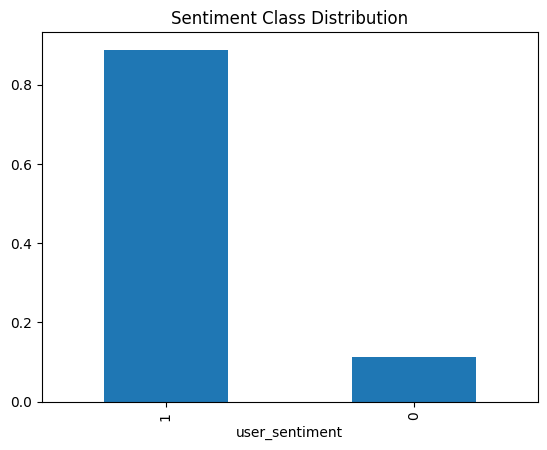

In [28]:
df['user_sentiment'].value_counts(normalize=True).plot(kind='bar', title='Sentiment Class Distribution')


Plotting a bar graph for checking if Ratings given by a user are alligned to the User Sentiment or not.

<Axes: title={'center': 'Avg Rating by Sentiment'}, xlabel='user_sentiment'>

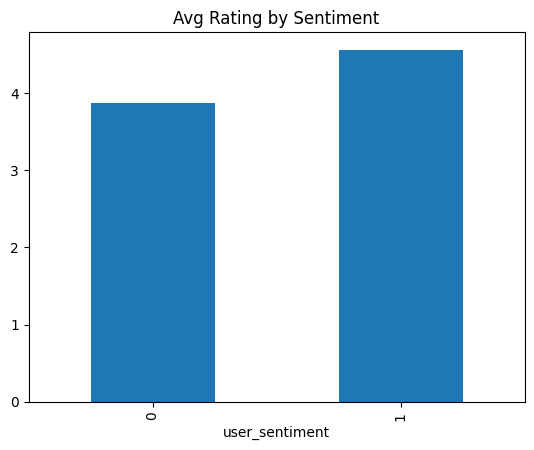

In [29]:
df.groupby('user_sentiment')['reviews_rating'].mean().plot(kind='bar', title='Avg Rating by Sentiment')


Checking if  reviews or sentiments have changed over time by plotting reviews and user sentiment against review year.

<Axes: title={'center': 'Sentiment Over Years'}, xlabel='review_year'>

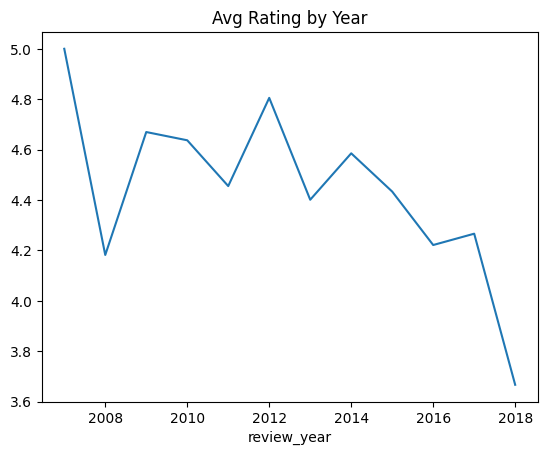

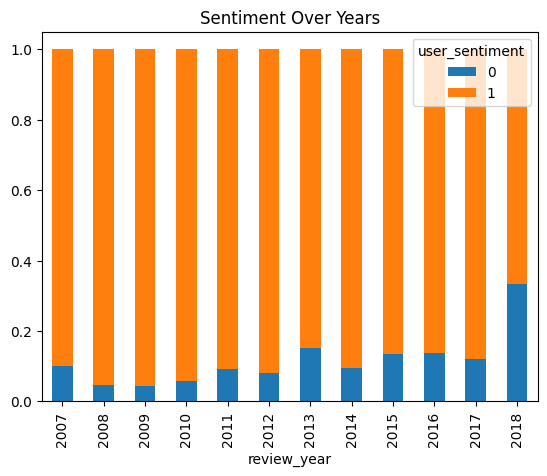

In [30]:
df.groupby('review_year')['reviews_rating'].mean().plot(title='Avg Rating by Year')
df.groupby('review_year')['user_sentiment'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, title='Sentiment Over Years')


**Data Cleaning & EDA Summary**

After addressing missing values, correcting data types, and removing irrelevant columns, the cleaned dataset contains 29,937 rows and 10 columns.

**Key Insights from Exploratory Data Analysis (EDA)**:

Class Imbalance in Sentiment:

The user_sentiment column is heavily imbalanced, with over 90% of reviews labeled as positive and only ~10% as negative. This imbalance may affect the performance of classification models if not handled properly.

Rating vs Sentiment Misalignment:

While positive sentiment reviews have an average rating around 4.5, negative sentiment reviews also show an average rating between 3 and 3.6 This suggests that some negative reviews are still associated with moderately high ratings, indicating a potential mismatch between textual sentiment and numeric rating.

Sentiment and Rating Shift in 2018:

From 2007 to 2017, sentiment and ratings remained relatively stable, with most reviews being positive. However, in 2018, there was a notable rise in negative sentiment and lower ratings, indicating a significant shift in user feedback behavior during that year.


**Text Processing**

In [31]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [32]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [33]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [34]:
def clean_basic(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [35]:
def clean_review(text):
    text = str(text).lower()
    text = re.sub(r"<.*?>", " ", text)                  # Remove HTML tags
    text = re.sub(r"[^a-zA-Z\s]", " ", text)            # Remove non-letter chars
    text = re.sub(r"\s+", " ", text).strip()

    # Tokenize and clean
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [36]:
#Applying functions on the columns
df['categories'] = df['categories'].map(clean_basic)
df['name'] = df['name'].map(clean_basic)
df['brand_combined'] = df['brand_combined'].map(clean_basic)
df['review'] = df['review'].map(clean_review)


In [37]:
df.head()

,categories,name,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,review_year,brand_combined,review
0,movies music books music r b movies tv movie b...,pink friday roman reloaded re up w dvd,-1,-1,5,joshua,1,2012,universal music universal music group cash money,awesome love album good hip hop side current p...
1,food packaged foods snacks crackers snacks coo...,lundberg organic cinnamon toast rice cakes,1,-1,5,dorothy w,1,2017,lundberg,good good flavor review collected part promotion
2,food packaged foods snacks crackers snacks coo...,lundberg organic cinnamon toast rice cakes,1,-1,5,dorothy w,1,2017,lundberg,good good flavor
3,personal care medicine cabinet lubricant sperm...,k y love sensuality pleasure gel,0,0,1,rebecca,0,2016,k y,disappointed read review looking buying one co...
4,personal care medicine cabinet lubricant sperm...,k y love sensuality pleasure gel,0,0,1,walker557,0,2016,k y,irritation husband bought gel u gel caused irr...


**FEATURE EXTRACTION**

Before proceeding with feature extraction, we will combine the review, categories, name, and brand_combined columns into a single text column. This will help capture product details, brand information, and customer reviews collectively, enabling the model to make more effective predictions.

In [38]:
df['combined_text'] = (
    df['review'].astype(str) + ' ' +
    df['categories'].astype(str) + ' ' +
    df['name'].astype(str) + ' ' +
    df['brand_combined'].astype(str)
)


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

Using Train test split to divide the data into test train sets and applying TF-IDF for vectorization

In [40]:
X = df['combined_text']
y = df['user_sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

tfidf = TfidfVectorizer(max_features=8000, ngram_range=(1,2), stop_words='english')
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("✅ TF-IDF vectorizer saved successfully as 'tfidf_vectorizer.pkl'")

✅ TF-IDF vectorizer saved successfully as 'tfidf_vectorizer.pkl'


At the end of Feature Extraction, we have used TF-IDF to vectorize the combined text which contains all the details of product category, brand, name , review title and review .

**MODEL BUILDING**

For model building, we are using Logistic Regression, Random Forest and XGBoost along with handling data imbalance . At the end we compare the results of three models and select the best one for predicting sentiments.

In [41]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from collections import Counter
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib
from sklearn.naive_bayes import MultinomialNB, ComplementNB

In [42]:
#Checking Class Imbalance
print("Class balance (train):", Counter(y_train))
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / max(pos, 1)

Class balance (train): Counter({1: 18605, 0: 2350})


In [43]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [44]:
#Creating a function which accepts the train data using all parameters of the model and  gives the F1 score, confusion matrix and the classification report.
#using same function for calling all the three models.
def run_grid(name, estimator, param_grid, scoring='f1'):
    gs = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        scoring=scoring,
        cv=cv,
        n_jobs=-1,
        verbose=0
    )
    gs.fit(X_train_vec, y_train)
    best = gs.best_estimator_
    y_pred = best.predict(X_test_vec)
    proba_ok = hasattr(best, "predict_proba")
    roc = roc_auc_score(y_test, best.predict_proba(X_test_vec)[:,1]) if proba_ok else np.nan
    f1 = f1_score(y_test, y_pred)
    print(f"\n=== {name} ===")
    print("Best params:", gs.best_params_)
    print(f"F1: {f1:.3f} | ROC-AUC: {roc:.3f}")
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=3))
    return {'name': name, 'f1': f1, 'roc_auc': roc, 'model': best}

results = []


***1.Logistic Regression Model***

In [45]:
lr = LogisticRegression(
    class_weight='balanced',
    max_iter=500,
    solver='liblinear',  # good for sparse + binary
    n_jobs=-1
)
grid_lr = {
    'C': [0.5, 1.0, 2.0]
}
results.append(run_grid("Logistic Regression", lr, grid_lr))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(



=== Logistic Regression ===
Best params: {'C': 2.0}
F1: 0.906 | ROC-AUC: 0.916
Confusion matrix:
 [[ 853  154]
 [1246 6729]]
              precision    recall  f1-score   support

           0      0.406     0.847     0.549      1007
           1      0.978     0.844     0.906      7975

    accuracy                          0.844      8982
   macro avg      0.692     0.845     0.728      8982
weighted avg      0.914     0.844     0.866      8982



***2.Random Forest Model***

In [46]:
rf_est = RandomForestClassifier(
    n_jobs=-1,
    random_state=42,
    class_weight='balanced',   # handles imbalance
    verbose=0
)

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

results.append(run_grid("Random Forest ", rf_est, rf_param_grid))


=== Random Forest  ===
Best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
F1: 0.946 | ROC-AUC: 0.819
Confusion matrix:
 [[ 188  819]
 [  90 7885]]
              precision    recall  f1-score   support

           0      0.676     0.187     0.293      1007
           1      0.906     0.989     0.946      7975

    accuracy                          0.899      8982
   macro avg      0.791     0.588     0.619      8982
weighted avg      0.880     0.899     0.872      8982



***3.Naive Bayes***

In [47]:
nb_est_m = MultinomialNB()
nb_param_grid_m = {
    'alpha': [0.1, 0.5, 1.0]
}
results.append(run_grid("MultinomialNB", nb_est_m, nb_param_grid_m))

nb_est_c = ComplementNB()
nb_param_grid_c = {
    'alpha': [0.1, 0.3, 0.5]
}
results.append(run_grid("ComplementNB", nb_est_c, nb_param_grid_c))



=== MultinomialNB ===
Best params: {'alpha': 0.1}
F1: 0.904 | ROC-AUC: 0.743
Confusion matrix:
 [[ 312  695]
 [ 825 7150]]
              precision    recall  f1-score   support

           0      0.274     0.310     0.291      1007
           1      0.911     0.897     0.904      7975

    accuracy                          0.831      8982
   macro avg      0.593     0.603     0.597      8982
weighted avg      0.840     0.831     0.835      8982


=== ComplementNB ===
Best params: {'alpha': 0.1}
F1: 0.838 | ROC-AUC: 0.743
Confusion matrix:
 [[ 489  518]
 [1850 6125]]
              precision    recall  f1-score   support

           0      0.209     0.486     0.292      1007
           1      0.922     0.768     0.838      7975

    accuracy                          0.736      8982
   macro avg      0.566     0.627     0.565      8982
weighted avg      0.842     0.736     0.777      8982



In [48]:
#---- Compare & pick best model based on F1_macro, ROC_AUC curve values and summary ----

from sklearn.metrics import precision_recall_fscore_support, f1_score, roc_auc_score


summary_rows = []
for r in results:
    model = r['model']
    name = r['name']
    y_pred = model.predict(X_test_vec)
    y_proba = model.predict_proba(X_test_vec)[:,1] if hasattr(model, "predict_proba") else None

    # macro f1 (treat classes equally)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    # class-wise f1
    prec, rec, f1s, _ = precision_recall_fscore_support(y_test, y_pred, labels=[0,1], zero_division=0)
    f1_class0 = f1s[0]
    f1_class1 = f1s[1]
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    summary_rows.append({
        'name': name,
        'f1_macro': round(f1_macro, 4),
        'f1_class0': round(f1_class0, 4),
        'f1_class1': round(f1_class1, 4),
        'roc_auc': round(roc, 4)
    })

summary_df = pd.DataFrame(summary_rows).sort_values(by=['f1_macro','roc_auc'], ascending=False)
print("\nDetailed summary sorted by f1_macro then roc_auc:\n")
print(summary_df)

# Option A: choose best by f1_macro (recommended for balanced performance)
best_name = summary_df.iloc[0]['name']
best_model = next(r['model'] for r in results if r['name'] == best_name)
print(f"\nSelected best model by f1_macro: {best_name}")

# Save chosen model
joblib.dump(best_model, 'sentiment_best_model_by_f1macro.joblib')
print("Saved: sentiment_best_model_by_f1macro.joblib")



Detailed summary sorted by f1_macro then roc_auc:

                  name  f1_macro  f1_class0  f1_class1  roc_auc
0  Logistic Regression    0.7275     0.5493     0.9058   0.9164
1       Random Forest     0.6191     0.2926     0.9455   0.8189
2        MultinomialNB    0.5975     0.2910     0.9039   0.7432
3         ComplementNB    0.5651     0.2923     0.8380   0.7432

Selected best model by f1_macro: Logistic Regression
Saved: sentiment_best_model_by_f1macro.joblib


We selected F1-Macro and ROC-AUC as the primary evaluation metrics for determining the best model. The F1-Macro score assigns equal importance to both positive and negative classes, making it the most suitable choice for our highly imbalanced dataset. The ROC-AUC score was considered as a secondary metric to evaluate the overall class separability.

Based on these metrics, Logistic Regression emerged as the best-performing model, achieving an F1-Macro score of 72%. It effectively identifies both positive and negative sentiments, making it the most reliable choice for predicting product sentiments.

**Recommendation System**

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from math import sqrt
from collections import defaultdict
import random

In [50]:
# ---------- CONFIG ----------
RANDOM_STATE = 42
holdout_fraction = 0.2   # fraction of each user's interactions to hold out as test
k_neighbors = 50         # number of neighbors to use when predicting
top_k_for_precision = 20 # top-K recommendations to evaluate precision

In [51]:
# ---------- PREP DATA ----------
ratings = df[['reviews_username', 'name', 'reviews_rating']].dropna().copy()
ratings = ratings.rename(columns={'reviews_username':'user', 'name':'item', 'reviews_rating':'rating'})

In [52]:
# Filter users with at least 2 interactions (so we can hold out)
user_counts = ratings['user'].value_counts()
ratings = ratings[ratings['user'].isin(user_counts[user_counts >= 2].index)].reset_index(drop=True)

In [53]:
# map user/item to indices
user2idx = {u:i for i,u in enumerate(ratings['user'].unique())}
item2idx = {i:j for j,i in enumerate(ratings['item'].unique())}
idx2user = {v:k for k,v in user2idx.items()}
idx2item = {v:k for k,v in item2idx.items()}

ratings['user_idx'] = ratings['user'].map(user2idx)
ratings['item_idx'] = ratings['item'].map(item2idx)

n_users = len(user2idx)
n_items = len(item2idx)
print(f"Users: {n_users}, Items: {n_items}, Ratings: {len(ratings)}")

Users: 3610, Items: 191, Ratings: 8633


In [54]:
def train_test_split_interactions(df_ratings, holdout_fraction=0.2, random_state=RANDOM_STATE):
    train_rows = []
    test_rows = []
    rng = np.random.RandomState(random_state)
    grouped = df_ratings.groupby('user_idx')
    for uid, group in grouped:
        rows = group.index.tolist()
        n_hold = max(1, int(len(rows) * holdout_fraction))
        test_idx = rng.choice(rows, size=n_hold, replace=False)
        test_set = set(test_idx)
        for r in rows:
            if r in test_set:
                test_rows.append(r)
            else:
                train_rows.append(r)
    train = df_ratings.loc[train_rows].reset_index(drop=True)
    test = df_ratings.loc[test_rows].reset_index(drop=True)
    return train, test

train_ratings, test_ratings = train_test_split_interactions(ratings, holdout_fraction)
print("Train interactions:", len(train_ratings), "Test interactions:", len(test_ratings))


Train interactions: 4977 Test interactions: 3656


In [55]:
# ---------- Build user-item rating matrix from train ----------
from scipy.sparse import csr_matrix

In [56]:
def build_urm(df_train, n_users, n_items):
    rows = df_train['user_idx'].values
    cols = df_train['item_idx'].values
    vals = df_train['rating'].values.astype(float)
    return csr_matrix((vals, (rows, cols)), shape=(n_users, n_items))

URM_train = build_urm(train_ratings, n_users, n_items)

In [57]:
# ---------- ITEM-ITEM SIMILARITY (cosine) ----------
# Use item vectors (items x users) for cosine similarity between items
print("Computing item-item similarity (may take time for many items)...")
item_user_matrix = URM_train.T.tocsr()   # items x users
# cosine similarity across items
item_sim = cosine_similarity(item_user_matrix, dense_output=False)

Computing item-item similarity (may take time for many items)...


In [58]:
# ---------- USER-USER SIMILARITY (cosine) ----------
print("Computing user-user similarity...")
user_item_matrix = URM_train.tocsr()     # users x items
user_sim = cosine_similarity(user_item_matrix, dense_output=False)

Computing user-user similarity...


In [59]:

from sklearn.neighbors import NearestNeighbors

# ---- 1️⃣ Build the Nearest Neighbors model for user similarity ----
k_neighbors = 50
user_item = URM_train.tocsr()

# Compute top-k most similar users (cosine distance → similarity = 1 - distance)
nn_model = NearestNeighbors(
    n_neighbors=k_neighbors + 1,  # +1 to include the user itself
    metric='cosine',
    algorithm='brute',
    n_jobs=-1
)
nn_model.fit(user_item)

# ---- 2️⃣ Get the neighbor indices and similarities ----
distances, indices = nn_model.kneighbors(user_item, return_distance=True)
similarities = 1 - distances  # cosine distance to similarity

# ---- 3️⃣ Remove self-neighbor (first one is the user itself) ----
user_topk_idx = indices[:, 1:]
user_topk_sim = similarities[:, 1:]

# ---- 4️⃣ Save them for deployment ----
np.save('user_topk_idx.npy', user_topk_idx)
np.save('user_topk_sim.npy', user_topk_sim)

print("✅ Saved user_topk_idx.npy and user_topk_sim.npy successfully!")
print(f"Shape of user_topk_idx: {user_topk_idx.shape}")


✅ Saved user_topk_idx.npy and user_topk_sim.npy successfully!
Shape of user_topk_idx: (3610, 50)


**Prediction of Item based and User based models and selecting the best performed one**

In [60]:
def predict_item_based(user_idx, item_idx, URM_train, item_sim, top_k=k_neighbors):
    # get neighbors for item
    # similarity of target item to all other items
    sim_row = item_sim[item_idx].toarray().ravel() if hasattr(item_sim[item_idx], "toarray") else item_sim[item_idx]
    # ratings by user on other items
    user_ratings = URM_train[user_idx].toarray().ravel()
    # ignore unrated items by user
    rated_mask = user_ratings > 0
    if not np.any(rated_mask):
        return np.nan  # cold user
    sims = sim_row[rated_mask]
    items_idx = np.where(rated_mask)[0]
    # pick top-k similar rated items
    top_k_idx = np.argsort(sims)[-top_k:]
    numer = np.dot(sims[top_k_idx], user_ratings[items_idx[top_k_idx]])
    denom = np.sum(np.abs(sims[top_k_idx])) + 1e-9
    return numer / denom


In [61]:
def predict_user_based(user_idx, item_idx, URM_train, user_sim, top_k=k_neighbors):
    # similarity of target user to all other users
    sim_row = user_sim[user_idx].toarray().ravel() if hasattr(user_sim[user_idx], "toarray") else user_sim[user_idx]
    # ratings from other users on the target item
    item_ratings = URM_train[:, item_idx].toarray().ravel()
    rated_mask = item_ratings > 0
    if not np.any(rated_mask):
        return np.nan
    sims = sim_row[rated_mask]
    users_idx = np.where(rated_mask)[0]
    top_k_idx = np.argsort(sims)[-top_k:]
    numer = np.dot(sims[top_k_idx], item_ratings[users_idx[top_k_idx]])
    denom = np.sum(np.abs(sims[top_k_idx])) + 1e-9
    return numer / denom

In [62]:
# Vectorize prediction across test set
def evaluate_prediction(test_df, predict_fn, URM_train, sim_matrix, k_neighbors=k_neighbors):
    preds = []
    truths = []
    for _, row in test_df.iterrows():
        u = int(row['user_idx'])
        i = int(row['item_idx'])
        truth = float(row['rating'])
        pred = predict_fn(u, i, URM_train, sim_matrix, top_k=k_neighbors)
        # fallback: if nan (cold), use user's mean rating from train or global mean
        if np.isnan(pred):
            user_r = URM_train[u].toarray().ravel()
            if np.any(user_r > 0):
                pred = user_r[user_r > 0].mean()
            else:
                pred = URM_train.data.mean() if URM_train.data.size>0 else 3.0
        preds.append(pred)
        truths.append(truth)
    rmse = sqrt(mean_squared_error(truths, preds))
    return rmse, preds, truths

In [63]:
print("Evaluating Item-based CF (RMSE)...")
rmse_item, preds_item, truths_item = evaluate_prediction(test_ratings, predict_item_based, URM_train, item_sim, k_neighbors=k_neighbors)
print("Item-based RMSE:", rmse_item)


Evaluating Item-based CF (RMSE)...
Item-based RMSE: 3.2677988264141917


In [64]:
print("Evaluating User-based CF (RMSE)...")
rmse_user, preds_user, truths_user = evaluate_prediction(test_ratings, predict_user_based, URM_train, user_sim, k_neighbors=k_neighbors)
print("User-based RMSE:", rmse_user)

Evaluating User-based CF (RMSE)...
User-based RMSE: 1.7593500904251351


In [65]:
# ---------- Precision@K evaluation (Top-K relevance) ----------
def recommend_top_k_item_based(user_idx, URM_train, item_sim, top_k=top_k_for_precision, exclude_seen=True):
    # score all items for user via item-based score: s = sum(sim * rating)
    user_ratings = URM_train[user_idx].toarray().ravel()
    seen = set(np.where(user_ratings>0)[0])
    # compute scores for all items: sim dot user_ratings
    # efficient: multiply item_sim (items x items) with user_ratings
    scores = item_sim.dot(user_ratings)  # yields item-score vector
    scores = np.array(scores).ravel() if hasattr(scores, "toarray") else np.array(scores)
    if exclude_seen:
        scores[list(seen)] = -np.inf
    top_items = np.argpartition(scores, -top_k)[-top_k:]
    top_items = top_items[np.argsort(scores[top_items])[::-1]]
    return top_items


In [66]:
def recommend_top_k_user_based(user_idx, URM_train, user_sim, top_k=top_k_for_precision, exclude_seen=True):
    user_ratings = URM_train[user_idx].toarray().ravel()
    seen = set(np.where(user_ratings>0)[0])
    # score items by weighted sum of user similarities * ratings
    scores = user_sim[user_idx].dot(URM_train.toarray())  # user x items
    scores = np.array(scores).ravel()
    if exclude_seen:
        scores[list(seen)] = -np.inf
    top_items = np.argpartition(scores, -top_k)[-top_k:]
    top_items = top_items[np.argsort(scores[top_items])[::-1]]
    return top_items


In [67]:
def precision_at_k(recommender_fn, URM_train, test_df, k=20):
    # For each user in test set, check how many of their test items are in top-k
    user_test_items = test_df.groupby('user_idx')['item_idx'].apply(set).to_dict()
    precisions = []
    for user_idx, true_items in user_test_items.items():
        rec_items = recommender_fn(user_idx, URM_train, item_sim, top_k=k) if recommender_fn.__name__ == 'recommend_top_k_item_based' else recommender_fn(user_idx, URM_train, user_sim, top_k=k)
        rec_set = set(rec_items)
        prec = len(rec_set & true_items) / k
        precisions.append(prec)
    return np.mean(precisions)

In [68]:
#calling the right recommenders
print("Computing Precision@K (Item-based)...")
prec_item = precision_at_k(recommend_top_k_item_based, URM_train, test_ratings, k=top_k_for_precision)
print(f"Item-based Precision@{top_k_for_precision}:", round(prec_item,4))

print("Computing Precision@K (User-based)...")
prec_user = precision_at_k(recommend_top_k_user_based, URM_train, test_ratings, k=top_k_for_precision)
print(f"User-based Precision@{top_k_for_precision}:", round(prec_user,4))

Computing Precision@K (Item-based)...
Item-based Precision@20: 0.0164
Computing Precision@K (User-based)...
User-based Precision@20: 0.0182


In [69]:
#Selection of best model
print("\n=== Summary ===")
print("Item-based RMSE:", rmse_item, "Precision@K:", prec_item)
print("User-based RMSE:", rmse_user, "Precision@K:", prec_user)

if (rmse_item < rmse_user) and (prec_item >= prec_user):
    winner = 'Item-based CF'
elif (rmse_user < rmse_item) and (prec_user >= prec_item):
    winner = 'User-based CF'
else:
    # pick by Precision@K if RMSE conflict, otherwise by RMSE
    winner = 'Item-based CF' if prec_item >= prec_user else 'User-based CF'

print("Selected recommender:", winner)


=== Summary ===
Item-based RMSE: 3.2677988264141917 Precision@K: 0.016357340720221606
User-based RMSE: 1.7593500904251351 Precision@K: 0.018185595567867033
Selected recommender: User-based CF


After evaluating both models on the test set, we concluded that the User-Based Recommendation System outperforms the Item-Based approach, achieving better results in terms of RMSE and Precision@K metrics.

Hence, the User-Based Recommendation System is selected as the final model for generating product recommendations.

**Recommendation of Top 20 Products to a Specified User**

In [70]:
def recommend_top_n_user_based(username, URM_train, user_sim, user2idx, idx2item, top_n=20, k_neighbors=50):
    if username not in user2idx:
        print("User not found in training data.")
        return []

    user_idx = user2idx[username]
    # Get similarity scores for this user to all others
    sim_scores = user_sim[user_idx].toarray().ravel() if hasattr(user_sim[user_idx], "toarray") else user_sim[user_idx]
    # Get top-k similar users (excluding the user itself)
    sim_scores[user_idx] = -1  # exclude self
    top_k_users = np.argsort(sim_scores)[-k_neighbors:]
    top_k_sims = sim_scores[top_k_users]
    # Get items rated by these similar users
    user_ratings = URM_train[user_idx].toarray().ravel()
    items_already_rated = set(np.where(user_ratings > 0)[0])
    # Predict scores for all items
    pred_scores = np.zeros(URM_train.shape[1])
    for i in range(URM_train.shape[1]):
        if i in items_already_rated:
            pred_scores[i] = -np.inf  # skip already rated
            continue

        # Get all ratings for this item from other users
        item_ratings = URM_train[:, i].toarray().ravel()
        rated_mask = item_ratings > 0
        if not np.any(rated_mask):
            continue

        sims = sim_scores[rated_mask]
        ratings = item_ratings[rated_mask]

        # Weighted average of ratings by similarity
        if np.sum(np.abs(sims)) > 0:
            pred_scores[i] = np.dot(sims, ratings) / (np.sum(np.abs(sims)) + 1e-9)
        else:
            pred_scores[i] = 0
      # Get top N recommended items
    top_items_idx = np.argpartition(pred_scores, -top_n)[-top_n:]
    top_items_idx = top_items_idx[np.argsort(pred_scores[top_items_idx])[::-1]]
    # Map back to product names
    top_items = [idx2item[i] for i in top_items_idx]

    return top_items

In [71]:
# Cheking : recommend for a username
username = "rebecca"
top_20_products = recommend_top_n_user_based(username, URM_train, user_sim, user2idx, idx2item, top_n=20, k_neighbors=50)

print(f"\nTop 20 recommended products for user '{username}':\n")
for rank, item in enumerate(top_20_products, start=1):
    print(f"{rank}. {item}")


Top 20 recommended products for user 'rebecca':

1. stander pt bedcane bed handle
2. godzilla 3d includes digital copy ultraviolet 3d 2d blu ray dvd
3. tostitos bite size tortilla chips
4. bisquick original pancake and baking mix 40oz
5. mike dave need wedding dates dvd digital
6. jason aldean they don t know
7. the resident evil collection 5 discs blu ray
8. red special edition dvdvideo
9. clorox disinfecting bathroom cleaner
10. the script no sound without silence cd
11. power crunch protein energy bar peanut butter creme original
12. the honest company laundry detergent
13. caress moisturizing body bar natural silk 4 75oz
14. there s something about mary dvd
15. lysol concentrate deodorizing cleaner original scent
16. orajel maximum strength toothache pain relief liquid
17. cars toon mater s tall tales
18. australian gold exotic blend lotion spf 4
19. diet canada dry ginger ale 12pk 12 fl oz cans
20. bounce dryer sheets fresh linen 160 sheets


**Fine-Tuning the Recommendation System and Recommendation of Top 5 Products**

In [72]:
sentiment_model = joblib.load('sentiment_best_model_by_f1macro.joblib')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

In [73]:
# Filter all reviews of these products from your dataset
df_top20 = df[df['name'].isin(top_20_products)].copy()
# Check structure
print(f"Total reviews in top 20 products: {len(df_top20)}")

Total reviews in top 20 products: 8909


In [74]:
#--------Predict sentiment for each review ----------

df_top20['clean_text'] = df_top20['combined_text']

# Transform and predict
X_test = vectorizer.transform(df_top20['clean_text'])
df_top20['predicted_sentiment'] = sentiment_model.predict(X_test)


In [75]:
#---------- Calculate positive sentiment percentage per product ----------
# Assuming predicted_sentiment = 1 for positive, 0 for negative
sentiment_summary = (
    df_top20.groupby('name')['predicted_sentiment']
    .agg(['count', 'sum'])
    .rename(columns={'count':'total_reviews', 'sum':'positive_reviews'})
    .reset_index()
)

sentiment_summary['positive_percentage'] = (
    sentiment_summary['positive_reviews'] / sentiment_summary['total_reviews'] * 100
)


In [76]:
# ---------- Sort and get top 5 products ----------
top_5_products = sentiment_summary.sort_values(by='positive_percentage', ascending=False).head(5)

print("\nTop 5 Products based on highest positive sentiment percentage:\n")
print(top_5_products[['name', 'positive_percentage', 'total_reviews']])


Top 5 Products based on highest positive sentiment percentage:

                                                 name  positive_percentage  \
14                      stander pt bedcane bed handle           100.000000   
13                       red special edition dvdvideo            92.261905   
17             the script no sound without silence cd            87.179487   
5                clorox disinfecting bathroom cleaner            85.728298   
7   godzilla 3d includes digital copy ultraviolet ...            84.571429   

    total_reviews  
14             11  
13            672  
17             39  
5            2039  
7            3325  


Saving the required files for Flask deployment.

In [77]:

import  pickle
from scipy import sparse
from sklearn.pipeline import Pipeline

# sentiment pipeline (TF-IDF + LogisticRegression pipeline)
sentiment_pipeline = Pipeline([
    ('tfidf', tfidf),
    ('model', sentiment_model)
])
joblib.dump(sentiment_pipeline, 'sentiment_pipeline.joblib')

# URM_train is scipy csr_matrix
sparse.save_npz('URM_train.npz', URM_train)

# user_topk_idx (n_users x k) and user_topk_sim (n_users x k) are numpy arrays
np.save('user_topk_idx.npy', user_topk_idx)
np.save('user_topk_sim.npy', user_topk_sim)

# Save maps
with open('user2idx.pkl','wb') as f:
    pickle.dump(user2idx, f)

with open('idx2item.pkl','wb') as f:
    pickle.dump(idx2item, f)


with open('item_idx_map.pkl','wb') as f:
    pickle.dump(item2idx, f)


In [77]:
!ls -lh /content

In [78]:
from google.colab import files
files.download('sentiment_pipeline.joblib')
files.download('URM_train.npz')
files.download('user_topk_idx.npy')
files.download('user_topk_sim.npy')
files.download('user2idx.pkl')
files.download('idx2item.pkl')
files.download('item_idx_map.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Project Summary**

We began the recommendation system project with data cleaning and exploratory data analysis (EDA) to understand the dataset and handle missing or inconsistent values. This was followed by text preprocessing to clean and normalize textual data such as reviews and product descriptions.

Next, we performed feature extraction using the TF-IDF vectorization technique to transform text data into meaningful numerical representations. Using these features, we built and evaluated three machine learning models — Logistic Regression, Random Forest, and Naive Bayes — to perform sentiment classification. Based on performance metrics such as F1-score and ROC-AUC, the Logistic Regression model was selected as the best-performing sentiment analysis model.

We then developed and compared two recommendation systems — User-Based and Item-Based Collaborative Filtering. Based on evaluation metrics (RMSE and Precision@K), the User-Based Recommendation System was found to perform better and was selected as the final recommendation model.

Finally, the project was integrated into an end-to-end web application using Flask, combining the Logistic Regression sentiment model with the User-Based Recommendation System. The deployed system takes a username as input and provides the top 5 personalized product recommendations for that user based on sentiment and user similarity.